## BINARY CLASSIFICATION FOR BLUES AND CLASSICAL MUSIC GENRES

* First of all, let's import every library and our config.py and functions.py files to the notebook.

In [1]:
%matplotlib inline
import itertools
import numpy, scipy, matplotlib.pyplot as plt, pandas, librosa,sklearn
import config, functions

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

* We obtain the data only for Blues and Classical music from our dataset.
* For this work, we don't use MFCC features.

In [2]:
data_set=pandas.read_csv('data_set.csv',index_col=False,usecols=(1,2,3,4,5,6,7,8,9,36))
data_set=data_set[:200]
GENRES=config.Genre2.GENRE_NAMES

number_of_rows,number_of_cols = data_set.shape
data_set[:5].style

* Let's split our dataset, %70 for training and %30 for test.
* Then we seperate both train and test datasets into two part. One for feature columns, one for class column.

In [3]:
from sklearn.model_selection import train_test_split

data_set_values=numpy.array(data_set)

train, test = train_test_split(data_set_values, test_size =config.Genre2.TEST_SIZE,random_state=1,
                              stratify=data_set_values[:,number_of_cols-1])

train_x=train[:,:number_of_cols-1]
train_y=train[:,number_of_cols-1]

test_x=test[:,:number_of_cols-1]
test_y=test[:,number_of_cols-1]

print("Training data size: {}".format(train.shape))
print("Test data size: {}".format(test.shape))


Training data size: (140, 10)
Test data size: (60, 10)


* We use several machine learning algorithms to make classification.
 - **Algorithms used:**
   - K-Neares Neighbor
   - Random Forest
   - Support Vector Machine
   - Neural Network

* Application of KNN algorithm and its performance analysis

Training Score: 0.914
Test score: 0.900
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['B' 'Cl' 'B' 'B' 'Cl' 'Cl' 'Cl' 'Cl' 'B' 'Cl' 'Cl' 'Cl' 'Cl' 'Cl' 'B' 'Cl'
 'B' 'Cl' 'B' 'Cl' 'B' 'Cl' 'B' 'B' 'Cl' 'B' 'Cl' 'Cl' 'B' 'B' 'B' 'Cl'
 'Cl' 'B' 'B' 'B' 'Cl' 'B' 'B' 'B' 'Cl' 'B' 'B' 'Cl' 'B' 'Cl' 'B' 'Cl' 'Cl'
 'Cl' 'B' 'Cl' 'Cl' 'B' 'B' 'B' 'Cl' 'Cl' 'B' 'B']

Predicted Test dataset labels: 
['B' 'Cl' 'B' 'B' 'Cl' 'Cl' 'Cl' 'B' 'B' 'Cl' 'Cl' 'Cl' 'Cl' 'Cl' 'B' 'Cl'
 'B' 'Cl' 'B' 'Cl' 'B' 'Cl' 'Cl' 'B' 'Cl' 'B' 'Cl' 'Cl' 'B' 'B' 'B' 'Cl'
 'Cl' 'B' 'Cl' 'B' 'Cl' 'B' 'B' 'Cl' 'Cl' 'Cl' 'B' 'Cl' 'B' 'Cl' 'B' 'Cl'
 'Cl' 'Cl' 'B' 'B' 'Cl' 'B' 'B' 'B' 'Cl' 'Cl' 'B' 'B']


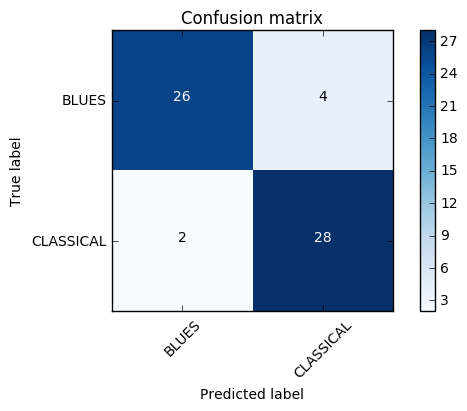

In [33]:
knn=KNeighborsClassifier()
knn.fit(train_x,train_y)

print("Training Score: {:.3f}".format(knn.score(train_x,train_y)))
print("Test score: {:.3f}".format(knn.score(test_x,test_y)))

functions.plot_cnf(knn,test_x,test_y,GENRES)

* Application of Random Forest algorithm and its performance analysis

Training Score: 0.986
Test score: 0.900
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['B' 'Cl' 'B' 'B' 'Cl' 'Cl' 'Cl' 'Cl' 'B' 'Cl' 'Cl' 'Cl' 'Cl' 'Cl' 'B' 'Cl'
 'B' 'Cl' 'B' 'Cl' 'B' 'Cl' 'B' 'B' 'Cl' 'B' 'Cl' 'Cl' 'B' 'B' 'B' 'Cl'
 'Cl' 'B' 'B' 'B' 'Cl' 'B' 'B' 'B' 'Cl' 'B' 'B' 'Cl' 'B' 'Cl' 'B' 'Cl' 'Cl'
 'Cl' 'B' 'Cl' 'Cl' 'B' 'B' 'B' 'Cl' 'Cl' 'B' 'B']

Predicted Test dataset labels: 
['B' 'Cl' 'B' 'B' 'Cl' 'Cl' 'Cl' 'Cl' 'B' 'B' 'Cl' 'Cl' 'Cl' 'Cl' 'B' 'Cl'
 'B' 'Cl' 'B' 'Cl' 'Cl' 'Cl' 'B' 'B' 'Cl' 'B' 'Cl' 'Cl' 'B' 'B' 'B' 'Cl'
 'Cl' 'B' 'Cl' 'B' 'Cl' 'B' 'B' 'Cl' 'Cl' 'B' 'B' 'Cl' 'B' 'Cl' 'B' 'Cl'
 'Cl' 'Cl' 'B' 'B' 'Cl' 'B' 'B' 'B' 'B' 'Cl' 'B' 'B']


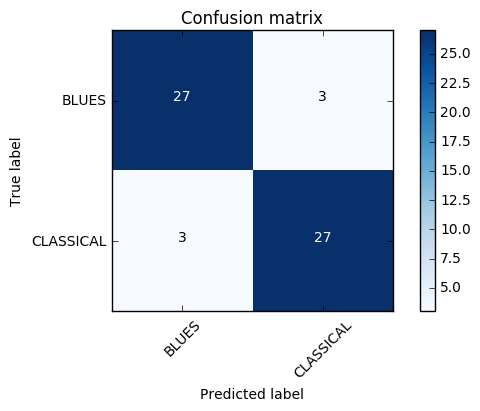

In [34]:
forest=RandomForestClassifier(random_state=1)
forest.fit(train_x,train_y)
print("Training Score: {:.3f}".format(forest.score(train_x,train_y)))
print("Test score: {:.3f}".format(forest.score(test_x,test_y)))

functions.plot_cnf(forest,test_x,test_y,GENRES)

* Application of SVM algorithm and its performance analysis

Training Score: 0.864
Test score: 0.867
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['B' 'Cl' 'B' 'B' 'Cl' 'Cl' 'Cl' 'Cl' 'B' 'Cl' 'Cl' 'Cl' 'Cl' 'Cl' 'B' 'Cl'
 'B' 'Cl' 'B' 'Cl' 'B' 'Cl' 'B' 'B' 'Cl' 'B' 'Cl' 'Cl' 'B' 'B' 'B' 'Cl'
 'Cl' 'B' 'B' 'B' 'Cl' 'B' 'B' 'B' 'Cl' 'B' 'B' 'Cl' 'B' 'Cl' 'B' 'Cl' 'Cl'
 'Cl' 'B' 'Cl' 'Cl' 'B' 'B' 'B' 'Cl' 'Cl' 'B' 'B']

Predicted Test dataset labels: 
['B' 'Cl' 'Cl' 'B' 'Cl' 'Cl' 'Cl' 'Cl' 'Cl' 'Cl' 'Cl' 'Cl' 'Cl' 'Cl' 'B'
 'Cl' 'B' 'Cl' 'B' 'Cl' 'B' 'Cl' 'B' 'B' 'Cl' 'B' 'Cl' 'Cl' 'B' 'B' 'B'
 'Cl' 'Cl' 'Cl' 'Cl' 'B' 'Cl' 'B' 'Cl' 'Cl' 'Cl' 'B' 'B' 'Cl' 'B' 'Cl' 'B'
 'Cl' 'Cl' 'Cl' 'B' 'B' 'Cl' 'B' 'B' 'B' 'B' 'Cl' 'B' 'B']


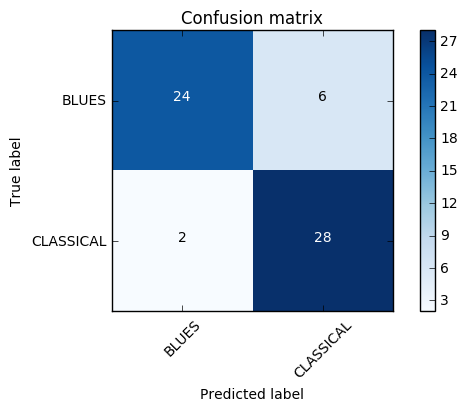

In [37]:
svm=SVC()
svm.fit(train_x,train_y)
print("Training Score: {:.3f}".format(svm.score(train_x,train_y)))
print("Test score: {:.3f}".format(svm.score(test_x,test_y)))

functions.plot_cnf(svm,test_x,test_y,GENRES)

* Application of Neural Network algorithm and its performance analysis

Training Score: 0.986
Test score: 0.933
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['B' 'Cl' 'B' 'B' 'Cl' 'Cl' 'Cl' 'Cl' 'B' 'Cl' 'Cl' 'Cl' 'Cl' 'Cl' 'B' 'Cl'
 'B' 'Cl' 'B' 'Cl' 'B' 'Cl' 'B' 'B' 'Cl' 'B' 'Cl' 'Cl' 'B' 'B' 'B' 'Cl'
 'Cl' 'B' 'B' 'B' 'Cl' 'B' 'B' 'B' 'Cl' 'B' 'B' 'Cl' 'B' 'Cl' 'B' 'Cl' 'Cl'
 'Cl' 'B' 'Cl' 'Cl' 'B' 'B' 'B' 'Cl' 'Cl' 'B' 'B']

Predicted Test dataset labels: 
['B' 'Cl' 'Cl' 'B' 'Cl' 'Cl' 'Cl' 'B' 'B' 'Cl' 'Cl' 'Cl' 'Cl' 'Cl' 'B' 'Cl'
 'B' 'Cl' 'B' 'Cl' 'B' 'Cl' 'B' 'B' 'Cl' 'B' 'Cl' 'Cl' 'B' 'B' 'B' 'Cl'
 'Cl' 'B' 'Cl' 'B' 'Cl' 'B' 'B' 'Cl' 'Cl' 'B' 'B' 'Cl' 'B' 'Cl' 'B' 'Cl'
 'Cl' 'Cl' 'B' 'Cl' 'Cl' 'B' 'B' 'B' 'Cl' 'Cl' 'B' 'B']


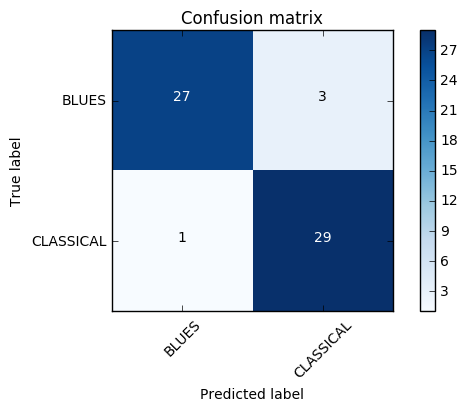

In [36]:
neural=MLPClassifier(max_iter=1100,random_state=1)
neural.fit(train_x,train_y)
print("Training Score: {:.3f}".format(neural.score(train_x,train_y)))
print("Test score: {:.3f}".format(neural.score(test_x,test_y)))

functions.plot_cnf(neural,test_x,test_y,GENRES)